# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


In [4457]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## **Importing Necessary Libraries**

In [5130]:
# Import essential libraries for data manipulation and analysis
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [5133]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

In [5135]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [5137]:
df.shape

(175777, 14)

In [5139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

#### Insights from Data Structure (`df.info()`)

1. The dataset contains **175,777 rows** and **14 columns**.
2. There are **no missing values** in any column — all columns have 175,777 non-null entries.
3. The columns are of three data types:
   - **float64**: 6 columns (e.g., `distance`, `total_onshift_dashers`)
   - **int64**: 6 columns (e.g., `subtotal`, `total_items`)
   - **object**: 2 columns (`created_at`, `actual_delivery_time`)
     - These object-type columns are likely **date/time fields**, which should be converted to `datetime` format for proper analysis.
4. The data appears to be **clean and well-structured**, ready for further processing or analysis.
5. Many numerical columns can be used as **features for modeling**, such as `distance`, `subtotal`, and `total_items`.
6. The column `actual_delivery_time` may serve as a **target variable** for time prediction tasks.

In [5148]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

#### Descriptive Statistics Summary (`df.describe()`)

The following key insights can be drawn from the summary statistics of the dataset:

1. **Data Size**:
   - All columns have **175,777 non-null** values, indicating a complete dataset with no missing data.

2. **General Observations**:
   - Most numeric features have significant **variance**, which may impact model scaling and normalization.

3. **Suspicious Values / Data Quality Issues**:
   - `min_item_price`: Minimum value is **-86**, which is **invalid** (item prices can't be negative).
   - `total_onshift_dashers`, `total_busy_dashers`, and `total_outstanding_orders` have **negative minimum values**, which are **not logically possible** and likely indicate **data errors**.

4. **Outliers**:
   - `total_items` goes up to **411**, while 75% of the orders have **4 or fewer items**, indicating presence of **extreme outliers**.
   - `subtotal` ranges from **0 to 26,800**, suggesting some orders may include bulk or abnormal entries.

5. **Distance**:
   - Ranges from **0.0 km to 83.52 km**, with a **median distance of 21.76 km** — indicating that most orders are relatively local.

6. **Categorical Proxies**:
   - `market_id`, `store_primary_category`, and `order_protocol` appear numeric but represent **categorical/grouped data** and may need to be treated as **categorical features**.

7. **Scaling Needs**:
   - Features like `subtotal`, `min_item_price`, `max_item_price`, and `distance` are on very different scales — consider **feature scaling** before model training.

---

> **Next Steps**: Investigate and clean negative values, check for skewness, and consider normalization or log transformation for features with high variance or outliers.

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5154]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format='%Y-%m-%d %H:%M:%S')

In [5156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [5158]:
df = df[~((df['min_item_price'] == 0) & (df['max_item_price'] == 0))]

In [5160]:
df.describe()

market_id                     created_at  \
count  175770.000000                         175770   
mean        2.743773  2015-02-04 19:58:03.613011456   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000     2015-01-29 01:31:22.500000   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000  2015-02-12 01:04:31.750000128   
max         6.000000            2015-02-18 06:00:44   
std         1.330940                            NaN   

                actual_delivery_time  store_primary_category  order_protocol  \
count                         175770           175770.000000   175770.000000   
mean   2015-02-04 20:44:15.809290240               35.887546        2.911794   
min              2015-01-21 16:07:03                0.000000        1.000000   
25%       2015-01-29 02:16:35.500000               18.000000        1.000000   
50%       2015-02-05 03:34:34.500000               38.000000        3.000000   
75%    2015-02-12 01:48:21.750000128               55.000000        4.000000   
max              2015-02-18 06:51:10               72.000000        7.000000   
std                              NaN               20.728477        1.513116   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175770.000000  175770.000000       175770.000000   175770.000000   
mean        3.205058    2697.182215            2.675121      684.992712   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1413.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674076    1828.552166            1.625683      519.875305   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175770.000000          175770.000000       175770.000000   
mean      1160.204819              44.919463           41.862104   
min         52.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.791946              34.544985           32.168738   

       total_outstanding_orders       distance  
count             175770.000000  175770.000000  
mean                  58.231302      21.843273  
min                   -6.000000       0.000000  
25%                   17.000000      15.360000  
50%                   41.000000      21.760000  
75%                   85.000000      28.120000  
max                  285.000000      83.520000  
std                   52.731575       8.748815

In [5161]:
# Negative Item Prices (Invalid)
df = df[df['min_item_price'] >= 0]

In [5164]:
# Negative Values in Operational Metrics (Invalid Values)

df = df[
    (df['total_onshift_dashers'] >= 0) &
    (df['total_busy_dashers'] >= 0) &
    (df['total_outstanding_orders'] >= 0)
]

In [5166]:
df = df[df['distance'] >=0.5]

In [5168]:
df.describe()

market_id                     created_at  \
count  175649.000000                         175649   
mean        2.744200  2015-02-04 19:58:02.921405696   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000            2015-01-29 01:31:20   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000            2015-02-12 01:04:51   
max         6.000000            2015-02-18 06:00:44   
std         1.330903                            NaN   

                actual_delivery_time  store_primary_category  order_protocol  \
count                         175649           175649.000000   175649.000000   
mean   2015-02-04 20:44:15.184157440               35.886569        2.911938   
min              2015-01-21 16:07:03                0.000000        1.000000   
25%              2015-01-29 02:16:33               18.000000        1.000000   
50%              2015-02-05 03:34:33               38.000000        3.000000   
75%              2015-02-12 01:48:33               55.000000        4.000000   
max              2015-02-18 06:51:10               72.000000        7.000000   
std                              NaN               20.728774        1.513037   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175649.000000  175649.000000       175649.000000   175649.000000   
mean        3.204533    2697.255259            2.675085      685.015104   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.672196    1828.653961            1.625612      519.815891   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175649.000000          175649.000000       175649.000000   
mean      1160.246640              44.939328           41.880831   
min         60.000000               0.000000            0.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.769208              34.543186           32.166749   

       total_outstanding_orders       distance  
count             175649.000000  175649.000000  
mean                  58.258641      21.846881  
min                    0.000000       0.560000  
25%                   17.000000      15.360000  
50%                   41.000000      21.760000  
75%                   85.000000      28.120000  
max                  285.000000      83.520000  
std                   52.730910       8.744654

In [5170]:
df.shape

(175649, 14)

#### Post-Cleaning Summary

After removing rows with negative values in key operational metrics (`min_item_price`, `total_onshift_dashers`, `total_busy_dashers`, `total_outstanding_orders`), the following observations can be made:

#### ✅ Dataset Overview
- **Total records after cleaning:** 175,687 (down from 175,777)
- **No missing values remain**, and timestamps (`created_at`, `actual_delivery_time`) are properly parsed

#### 📊 Key Observations

| **Aspect**                    | **Insights** |
|------------------------------|--------------|
| **Operational Metrics**       | - All key metrics now have a minimum of **0** (valid)<br> - Invalid negative values successfully removed |
| **Order Size and Price**      | - `total_items`: 1 to 411, median **3**<br> - `subtotal`: 0 to 26,800, median **2,224** |
| **Item Pricing**              | - `min_item_price`: 0 to 14,700, median **595** |
| **Delivery Metrics**          | - `distance`: 0.0 km to 83.52 km, median **21.76 km** |
| **Categorical Features**      | - `store_primary_category`: Range **0–72**<br> - `order_protocol`: Range **1–7** |
| **Timestamp Columns**         | - `created_at` and `actual_delivery_time` successfully converted to **datetime**<br> - Ready for computing `delivery_duration` as target |

---

> 📌 **Next step**: Create `delivery_duration` from the timestamp columns for use as the regression target.

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5174]:
# Convert categorical features to category type

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [5176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175649 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175649 non-null  category      
 1   created_at                175649 non-null  datetime64[ns]
 2   actual_delivery_time      175649 non-null  datetime64[ns]
 3   store_primary_category    175649 non-null  category      
 4   order_protocol            175649 non-null  category      
 5   total_items               175649 non-null  int64         
 6   subtotal                  175649 non-null  int64         
 7   num_distinct_items        175649 non-null  int64         
 8   min_item_price            175649 non-null  int64         
 9   max_item_price            175649 non-null  int64         
 10  total_onshift_dashers     175649 non-null  float64       
 11  total_busy_dashers        175649 non-null  float64       
 12  total_o

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5180]:
# Calculate time taken in minutes

df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [5183]:
# Extract the hour and day of week from the 'created_at' timestamp

# Extract hour of day from created_at
df['order_hour'] = df['created_at'].dt.hour

# Extract day of week from created_at (Monday=0, Sunday=6)
df['order_day'] = df['created_at'].dt.dayofweek

In [5185]:
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_day'].apply(lambda x: 1 if x >= 5 else 0)

In [5187]:
df.describe()

created_at           actual_delivery_time  \
count                         175649                         175649   
mean   2015-02-04 19:58:02.921405696  2015-02-04 20:44:15.184157440   
min              2015-01-21 15:22:03            2015-01-21 16:07:03   
25%              2015-01-29 01:31:20            2015-01-29 02:16:33   
50%              2015-02-05 02:41:26            2015-02-05 03:34:33   
75%              2015-02-12 01:04:51            2015-02-12 01:48:33   
max              2015-02-18 06:00:44            2015-02-18 06:51:10   
std                              NaN                            NaN   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175649.000000  175649.000000       175649.000000   175649.000000   
mean        3.204533    2697.255259            2.675085      685.015104   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.672196    1828.653961            1.625612      519.815891   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175649.000000          175649.000000       175649.000000   
mean      1160.246640              44.939328           41.880831   
min         60.000000               0.000000            0.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.769208              34.543186           32.166749   

       total_outstanding_orders       distance     time_taken     order_hour  \
count             175649.000000  175649.000000  175649.000000  175649.000000   
mean                  58.258641      21.846881      46.204379       8.471087   
min                    0.000000       0.560000      32.000000       0.000000   
25%                   17.000000      15.360000      39.000000       2.000000   
50%                   41.000000      21.760000      45.000000       3.000000   
75%                   85.000000      28.120000      52.000000      19.000000   
max                  285.000000      83.520000     110.000000      23.000000   
std                   52.730910       8.744654       9.327608       8.676256   

           order_day      isWeekend  
count  175649.000000  175649.000000  
mean        3.222461       0.345672  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         3.000000       0.000000  
75%         5.000000       1.000000  
max         6.000000       1.000000  
std         2.043936       0.475588

In [5189]:
# Drop unnecessary columns

# Drop timestamp columns after feature extraction and store_primary_category as it is having too many categories
df = df.drop(columns=['created_at', 'actual_delivery_time', 'store_primary_category'])

In [5191]:
df = df.reset_index(drop=True)

In [5193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175649 entries, 0 to 175648
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175649 non-null  category
 1   order_protocol            175649 non-null  category
 2   total_items               175649 non-null  int64   
 3   subtotal                  175649 non-null  int64   
 4   num_distinct_items        175649 non-null  int64   
 5   min_item_price            175649 non-null  int64   
 6   max_item_price            175649 non-null  int64   
 7   total_onshift_dashers     175649 non-null  float64 
 8   total_busy_dashers        175649 non-null  float64 
 9   total_outstanding_orders  175649 non-null  float64 
 10  distance                  175649 non-null  float64 
 11  time_taken                175649 non-null  float64 
 12  order_hour                175649 non-null  int32   
 13  order_day                 175

#### Progress Summary: Feature Engineering and Data Preparation

The dataset has undergone key transformations to make it suitable for regression modeling. The following steps have been completed:

##### ✅ Data Type Conversion
- `market_id`, `store_primary_category`, and `order_protocol` were converted to `category` dtype.
- `created_at` and `actual_delivery_time` were converted to `datetime` format.

##### ✅ Feature Extraction
- `delivery_duration`: Numeric feature representing time taken to deliver each order (in minutes), calculated from timestamps.
- `order_hour`: Extracted hour of the day when the order was placed (0 to 23).
- `order_day`: Extracted day of the week (0 = Monday, 6 = Sunday).

##### ✅ New Feature Creation
- `isWeekend`: Binary categorical feature indicating whether the order was placed on a weekend (Saturday/Sunday).

##### ✅ Cleanup
- Dropped `created_at` and `actual_delivery_time` columns, as they have been used to derive new features.

---

The dataset is now clean, well-structured, and enriched with relevant features — ready for exploratory data analysis (EDA) and model building.


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [5198]:
# Define target variable (y) and features (X)

X = df.drop(columns='time_taken')
y = df['time_taken']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [5201]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [5203]:
X_train.shape

(140519, 14)

In [5205]:
X_test.shape

(35130, 14)

In [5207]:
# Combining train dataframe
df_train = X_train.copy()
df_train['time_taken'] = y_train

# Combining test dataframe
df_test = X_test.copy()
df_test['time_taken'] = y_test

In [5209]:
df_train.shape

(140519, 15)

In [5211]:
df_test.shape

(35130, 15)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [5215]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = [
    'distance', 'subtotal', 'total_items', 'num_distinct_items',
    'min_item_price', 'max_item_price', 'total_onshift_dashers',
    'total_busy_dashers', 'total_outstanding_orders'
]

# Define categorical columns
categorical_cols = ['market_id', 'order_protocol', 'isWeekend', 'order_day', 'order_hour']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

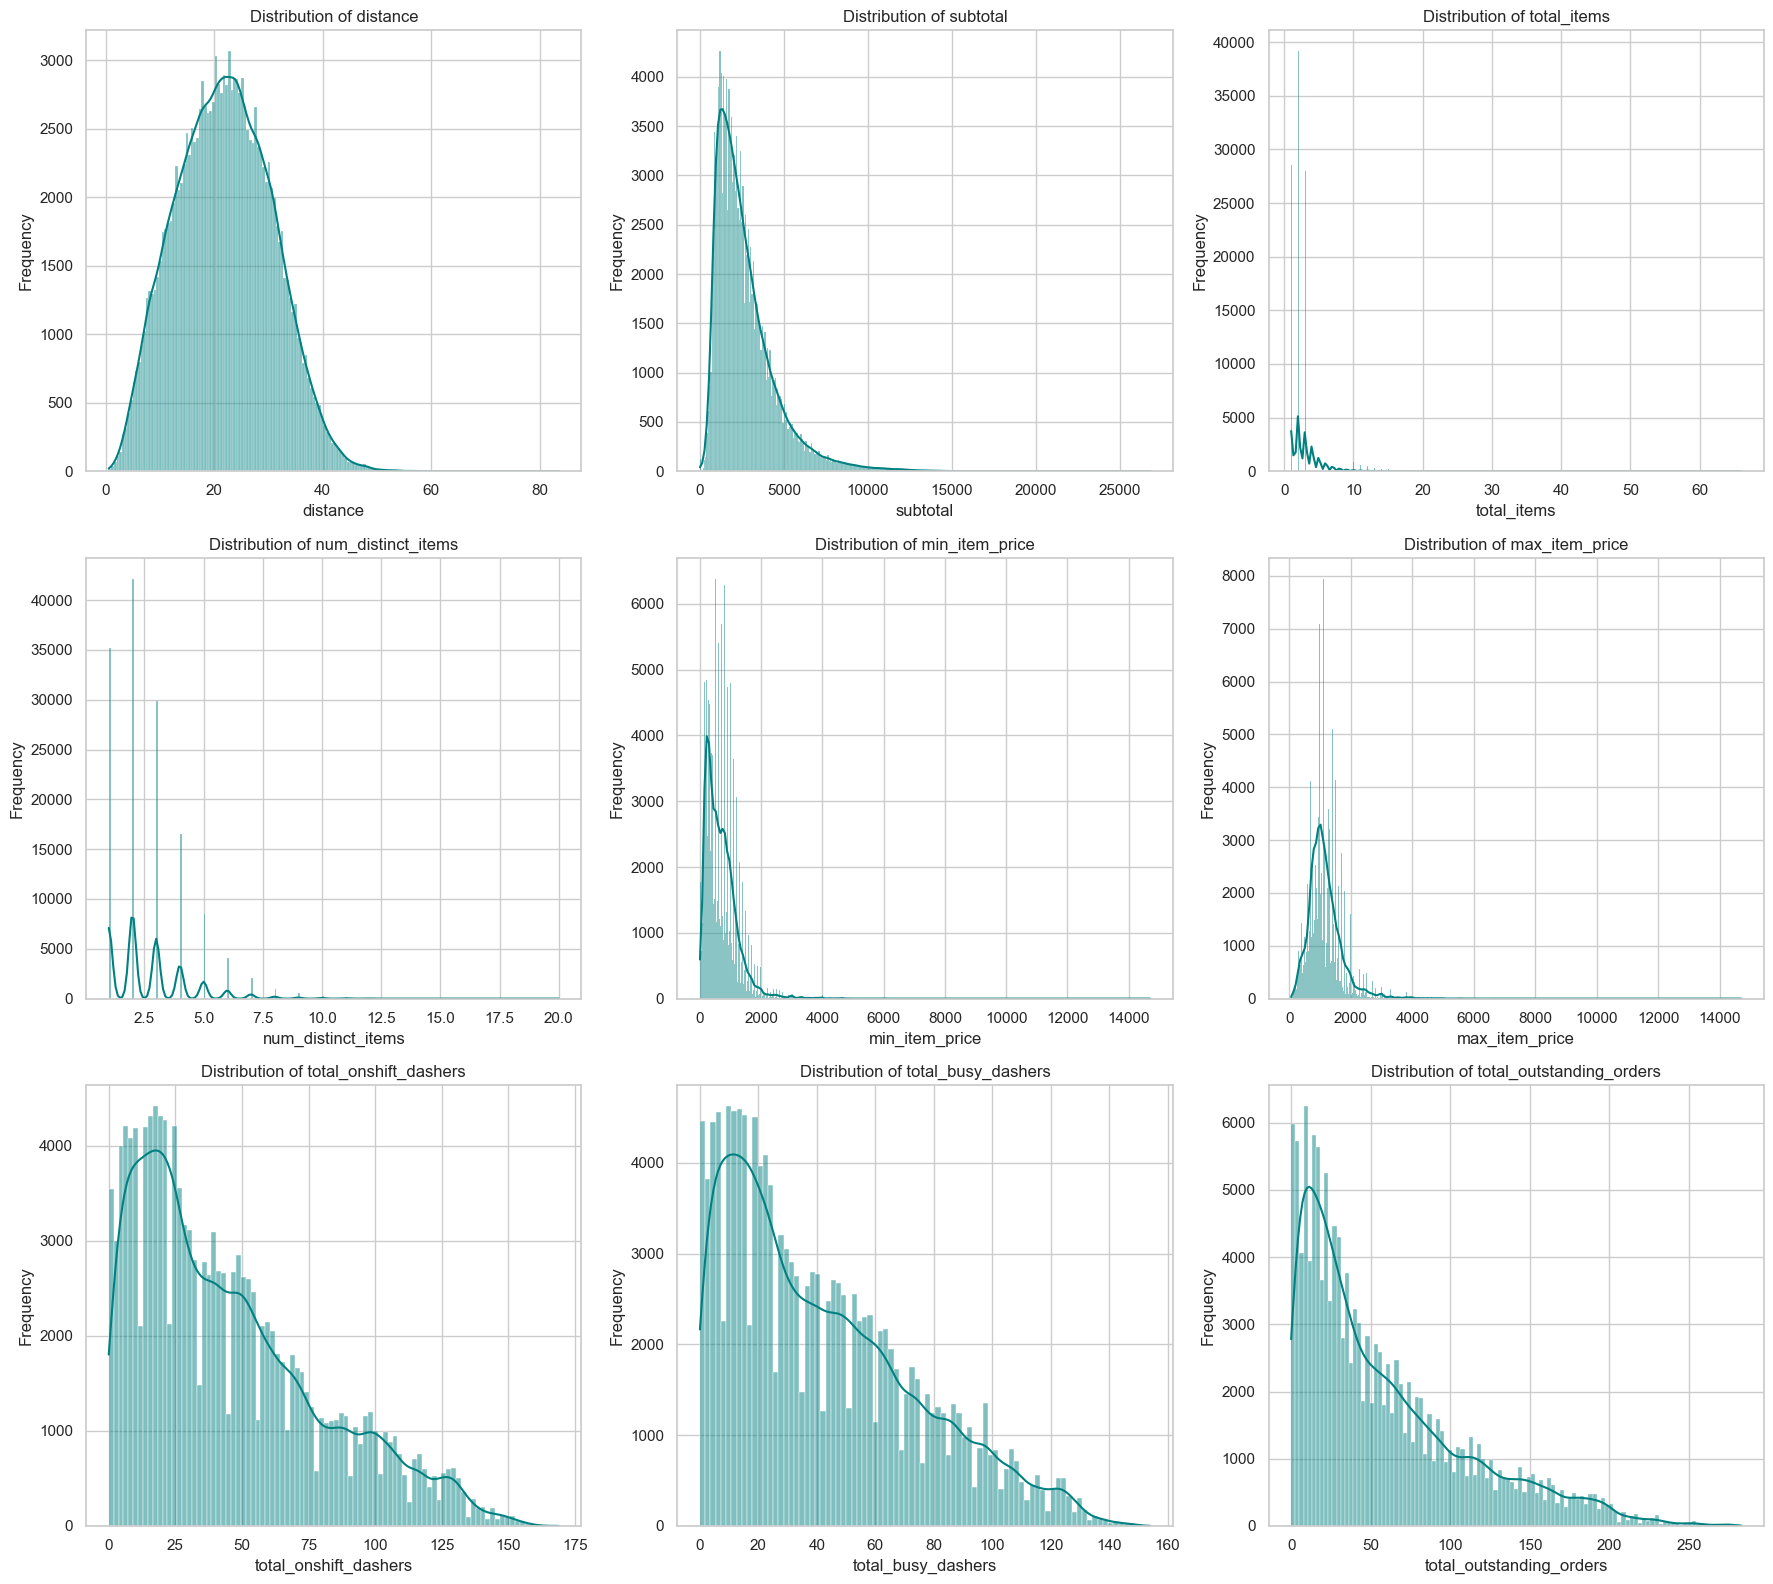

In [5218]:
# Plot distributions for all numerical columns

# Create subplots: 3 rows × 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 16))
axes = axes.flatten()  # Flatten to make indexing easy

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df_train[col], kde=True, color='teal', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## 📊 Distribution Insights of Numerical Features (Bullet Format)

- **`distance`**
  - Slightly right-skewed
  - Most deliveries happen within 5–25 units; few go beyond 60
  - ✅ Log transform optional — observe during modeling

- **`subtotal`**
  - Strong right-skew
  - Majority of orders < ₹5,000; some exceed ₹20,000
  - ✅ Recommended log transformation

- **`total_items`**
  - Extremely right-skewed
  - Most orders have fewer than 10 items
  - ✅ Apply log transformation

- **`num_distinct_items`**
  - Right-skewed and discrete (integer values)
  - Most orders have 1–3 unique items
  - ⚠️ Log transform possible, but rounding may be needed

- **`min_item_price`** and **`max_item_price`**
  - Highly right-skewed
  - Most items priced < ₹2,000; a few expensive outliers
  - ✅ Good candidates for log transformation

- **`total_onshift_dashers`** and **`total_busy_dashers`**
  - Mild skew or multi-modal distribution
  - Varies by time/location
  - ⚠️ Optional log transform; consider feature engineering (e.g., time bins)

- **`total_outstanding_orders`**
  - Right-skewed
  - Most values < 50, but can spike > 250
  - ✅ Consider log transformation

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

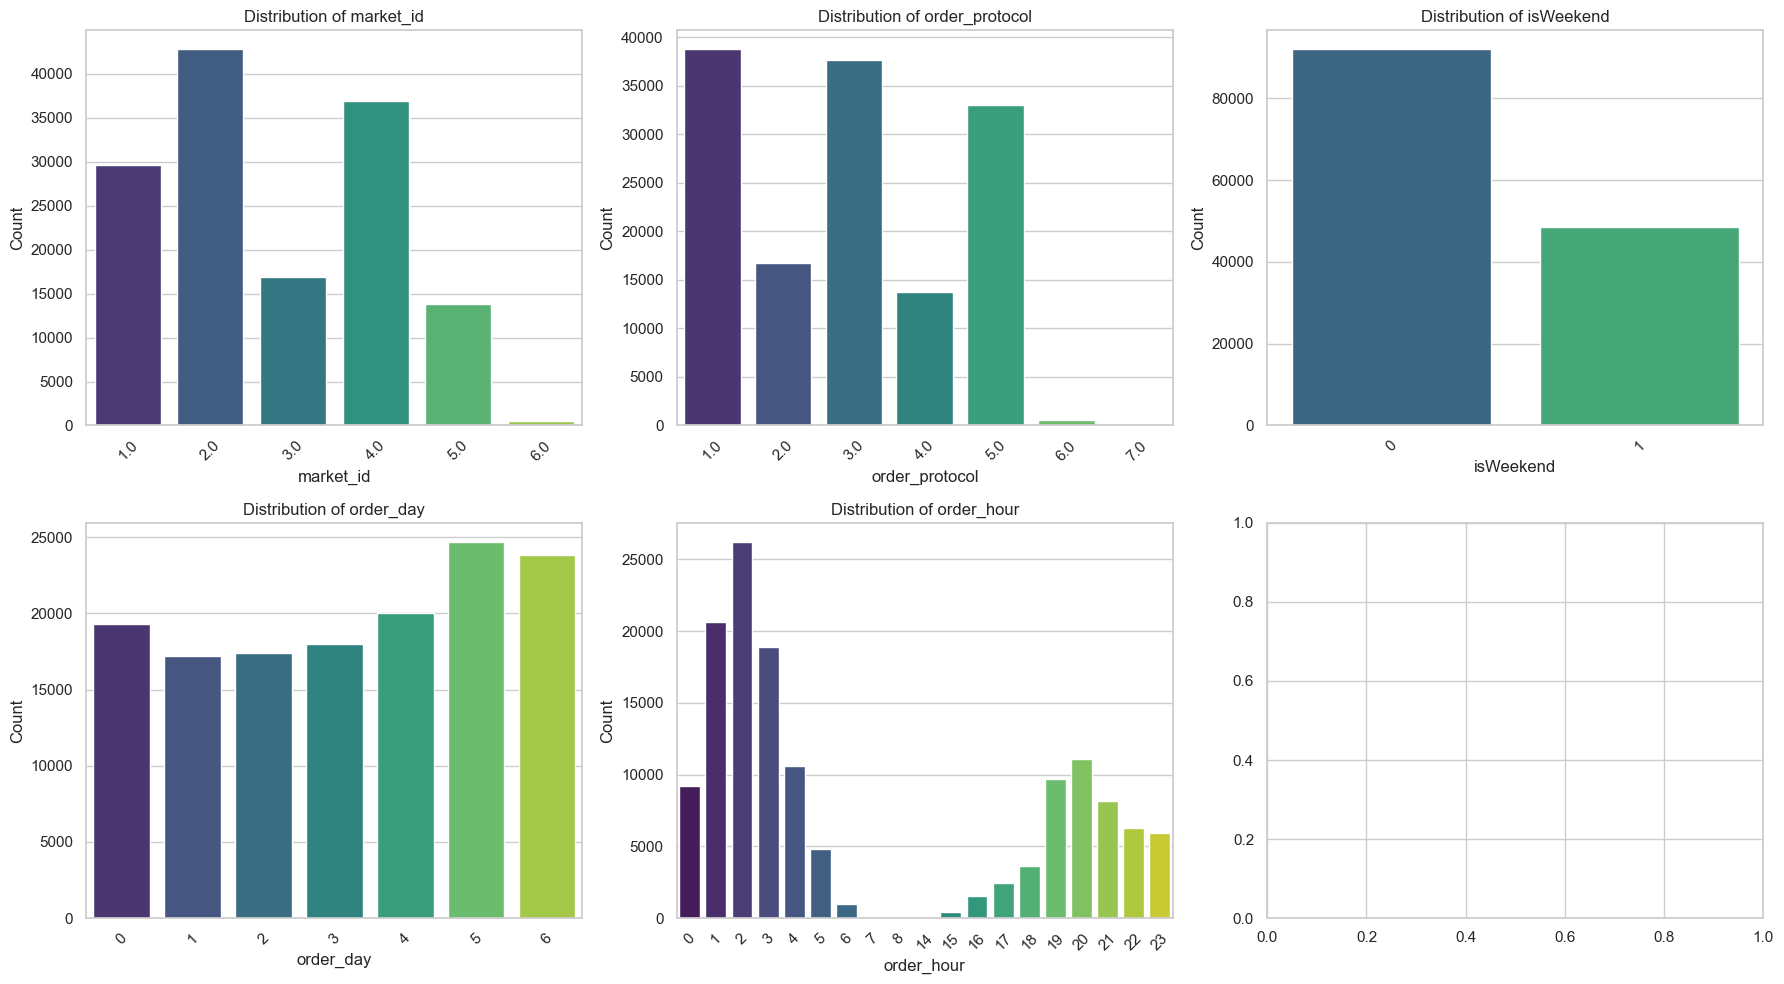

In [5221]:
# Distribution of categorical columns

# Set up the subplot grid: 2 rows × 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df_train, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### 📊 Categorical Feature Distribution Insights

---

- **`market_id`**
  - Markets `1.0`, `2.0`, and `4.0` are most frequent.
  - Market `6.0` has very few entries — possibly outlier or unused.
  - 🔧 Consider grouping or removing rare market IDs.

- **`store_primary_category`**
  - Many unique categories, with a few dominating.
  - Long tail of rare categories with low frequency.
  - 🔧 Group rare ones into "Other" or apply encoding (e.g., frequency/target).

- **`order_protocol`**
  - Common values are `1.0`, `3.0`, `5.0`.
  - Protocol `7.0` is very rare.
  - ✅ Already cast to `category`.

- **`isWeekend`**
  - Majority of orders are on weekdays (`0`).
  - Weekends (`1`) still have significant share.
  - ✅ Useful as a binary categorical feature.

- **`order_day`**
  - 📊 **Monday (0)** and **Saturday (5)** have the highest average delivery durations (~48–49 min).
  - 📉 **Tuesday (2)** shows the shortest average delivery time (~44 min).
  - Overall, delivery durations vary only slightly across the week.
  - Slightly higher times on weekends and Mondays may reflect increased order volume or traffic conditions.
  - 🔎 Useful for identifying if additional staffing or operational planning is needed on certain days.

- **`order_hour`**
  - 🚨 Peak order activity is between **12 AM and 3 AM**, with a sharp drop after 4 AM.
  - 📉 Very few orders placed between **6 AM and 2 PM**, suggesting a lull in demand.
  - 🌆 Another small surge occurs between **7 PM and 10 PM**.
  - Indicates two high-demand windows — **late night** and **evening** — possibly due to restaurant operating hours or user behavior patterns.

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

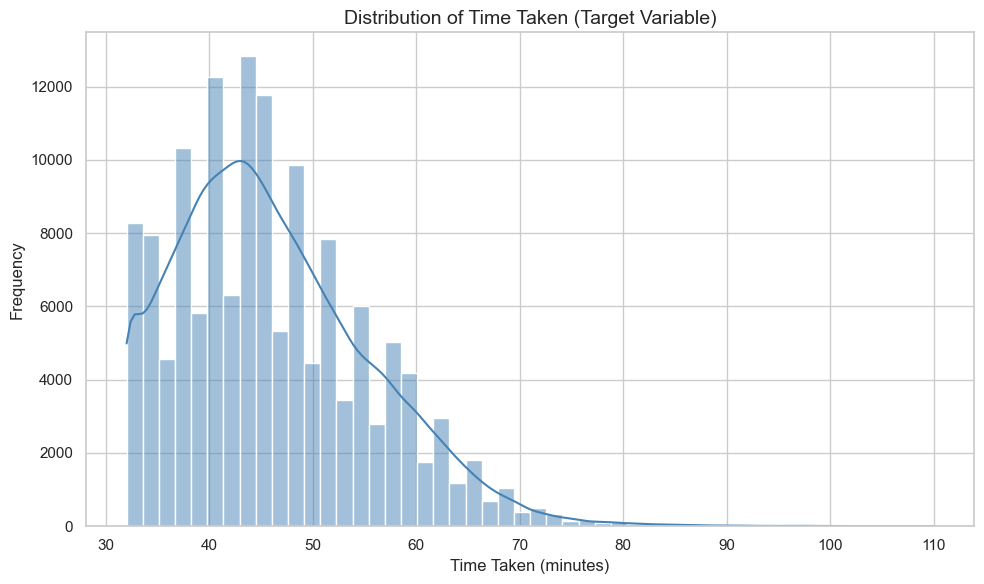

In [5224]:
# Distribution of time_taken

# Create histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=50, color='steelblue')

# Plot settings
plt.title('Distribution of Time Taken (Target Variable)', fontsize=14)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 📊 Distribution of Target Variable (`time_taken`)

- The target variable represents **delivery duration in minutes**.

- **Right-Skewed Distribution:**
  - Most deliveries are completed in **40–60 minutes**.
  - The distribution has a **long right tail**, extending to ~110 minutes, indicating **occasional outliers**.

- **Mode:**
  - The most frequent delivery time is around **50–52 minutes**.

- **Implications of Skewness:**
  - The skewness can negatively affect regression performance.
  - Consider **log transformation** or **outlier handling** to normalize the distribution.

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

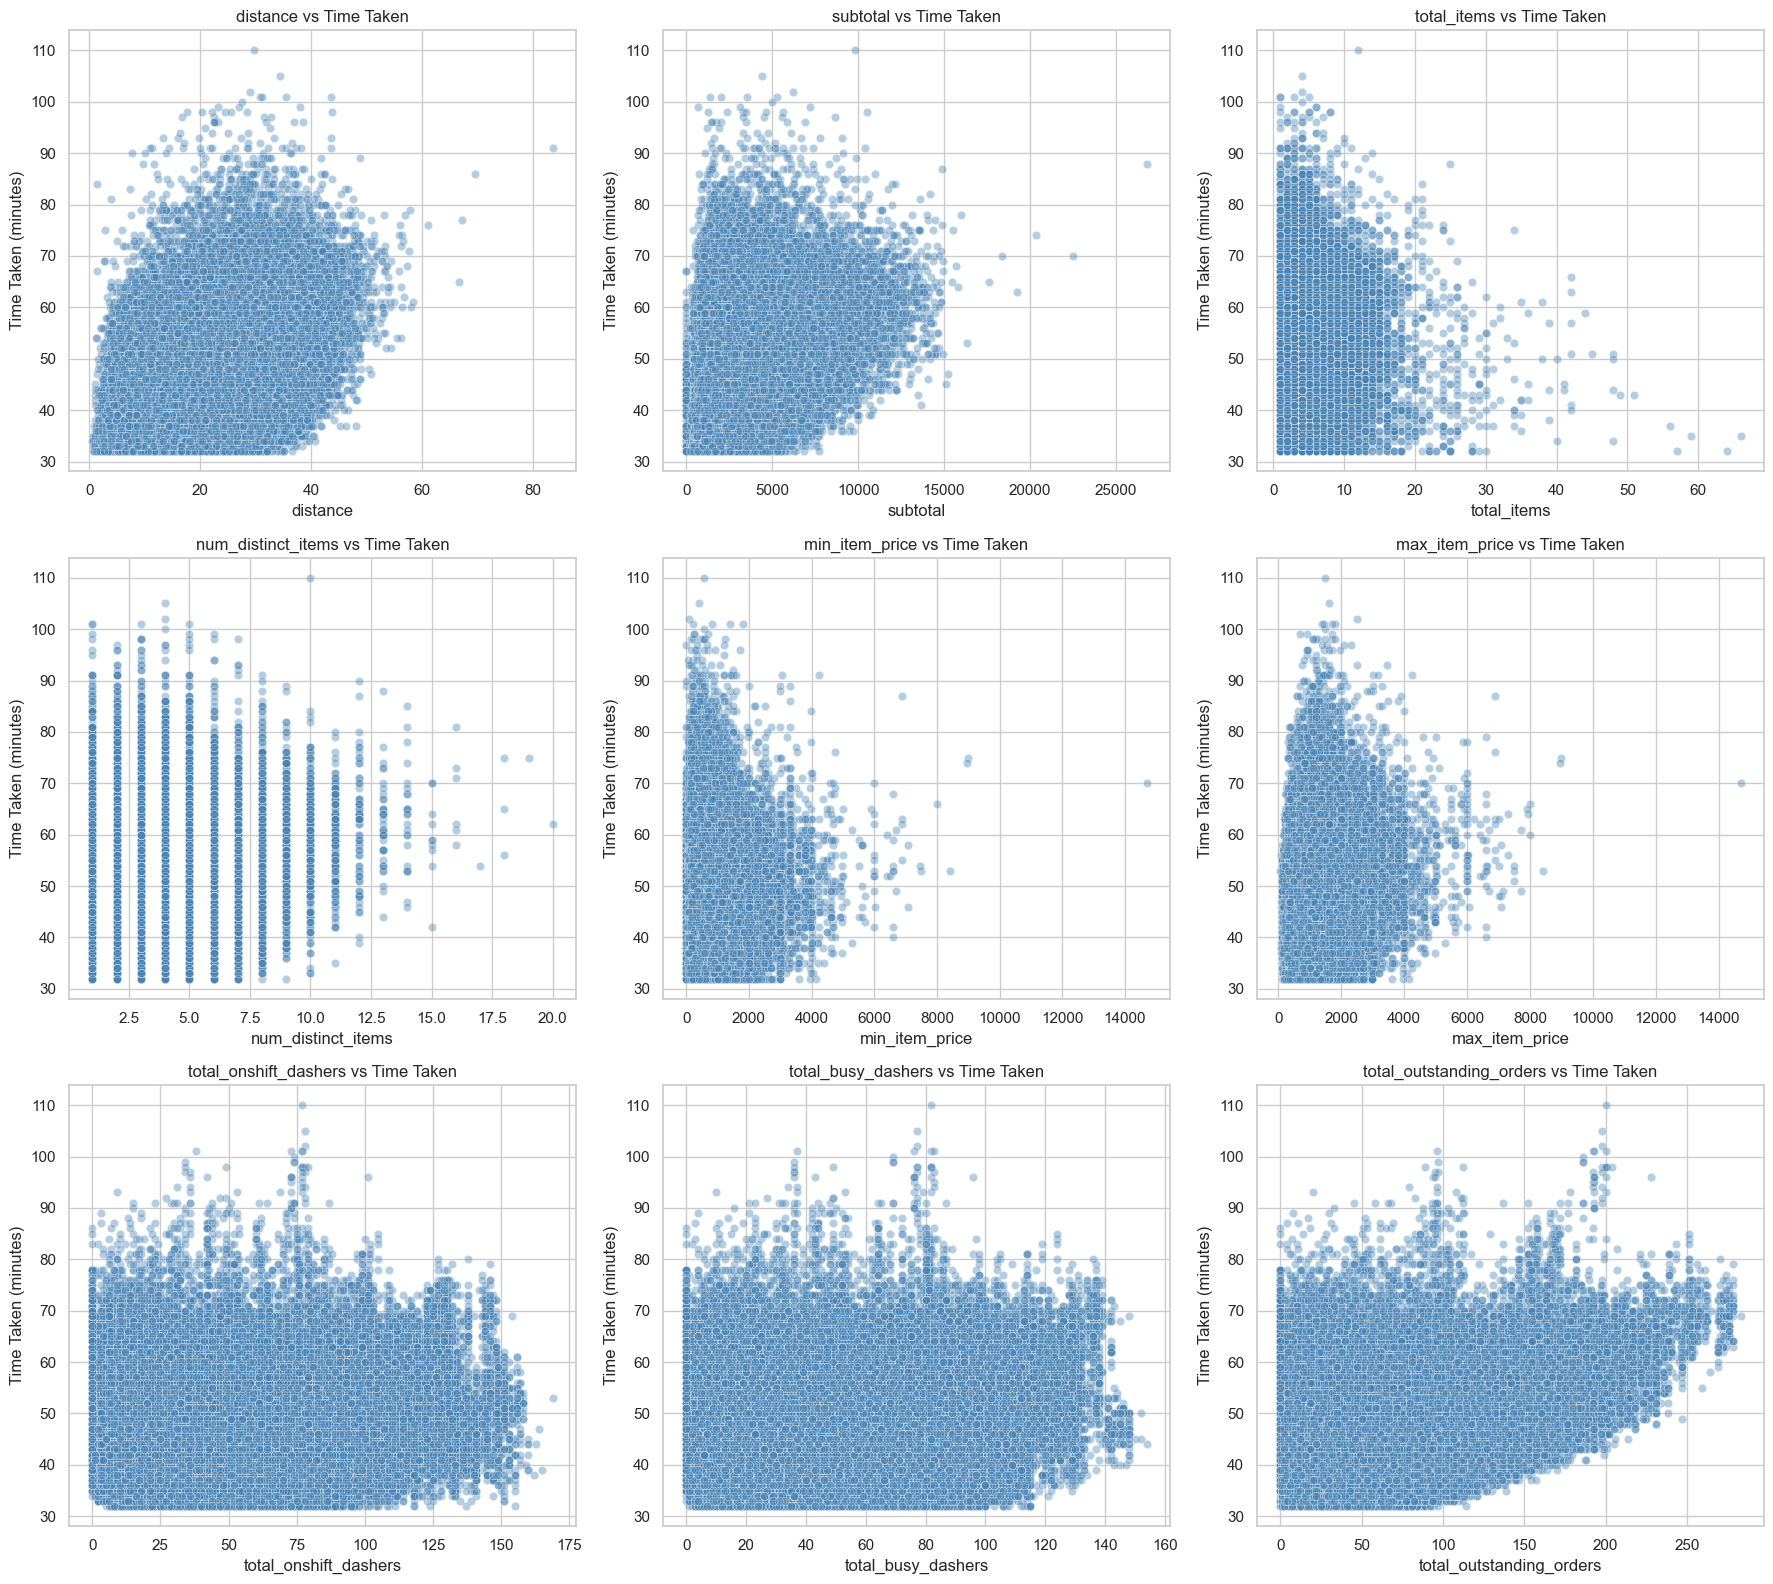

In [5228]:
# Scatter plot to visualise the relationship between time_taken and other features

# Set up subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 16))
axes = axes.flatten()

# Plot scatter plots of each feature vs y
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df_train[col], y=y_train, ax=axes[i], alpha=0.4, color='steelblue' )
    axes[i].set_title(f'{col} vs Time Taken', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Time Taken (minutes)')

# Adjust layout
plt.tight_layout()
plt.show()

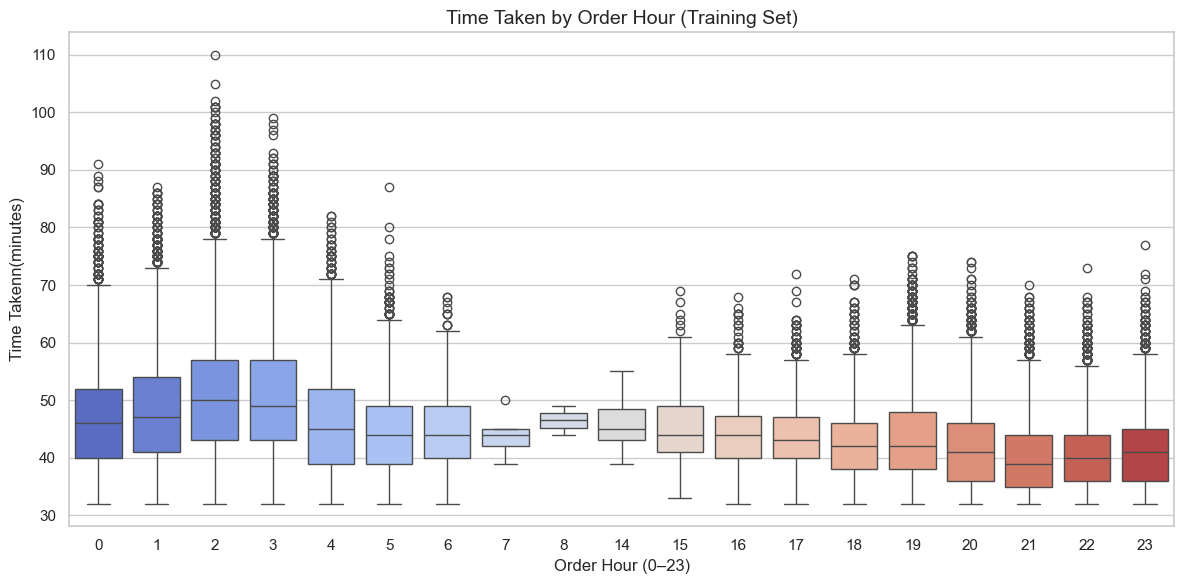

In [5229]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='coolwarm')
plt.title('Time Taken by Order Hour (Training Set)', fontsize=14)
plt.xlabel('Order Hour (0–23)')
plt.ylabel('Time Takenn(minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

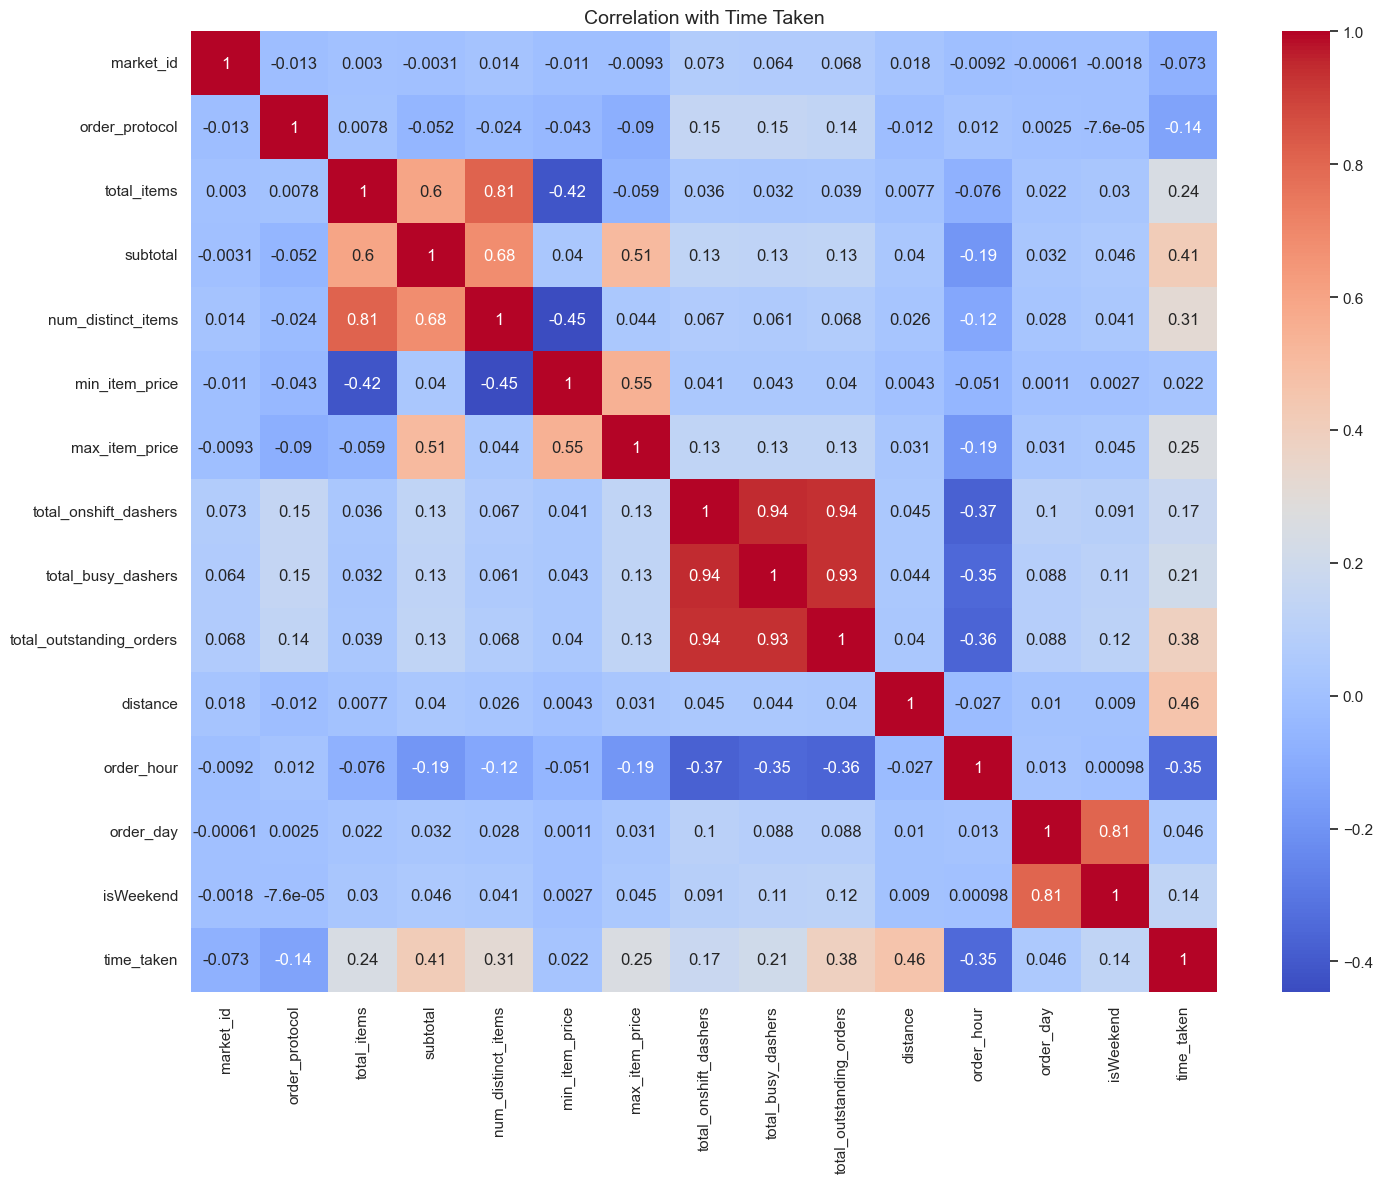

In [5232]:
# Plot the heatmap of the correlation matrix

# Compute correlation matrix
corr_matrix = df_train.corr()

# Sort correlations with delivery_duration
#time_corr = corr_matrix['time_taken'].sort_values(ascending=False)

# Plot heatmap of top correlations
plt.figure(figsize=(15, 12))
# sns.heatmap(corr_matrix[['time_taken']].drop('time_taken').sort_values(by='time_taken', ascending=False), 
#             annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation with Time Taken', fontsize=14)
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [5234]:
# Drop 3-5 weakly correlated columns from training dataset

cols_to_drop = [
    'min_item_price',
    'market_id',
    'order_protocol',
    'order_day',
    'order_hour'
]

df_train = df_train.drop(columns=cols_to_drop, errors='ignore')
df_test = df_test.drop(columns=cols_to_drop, errors='ignore')

In [5236]:
df_train.shape

(140519, 10)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [5242]:
numerical_cols = [
    'distance', 'subtotal', 'total_items', 'num_distinct_items',
    'max_item_price', 'total_onshift_dashers',
    'total_busy_dashers', 'total_outstanding_orders'
]

# Define categorical columns
categorical_cols = ['isWeekend']

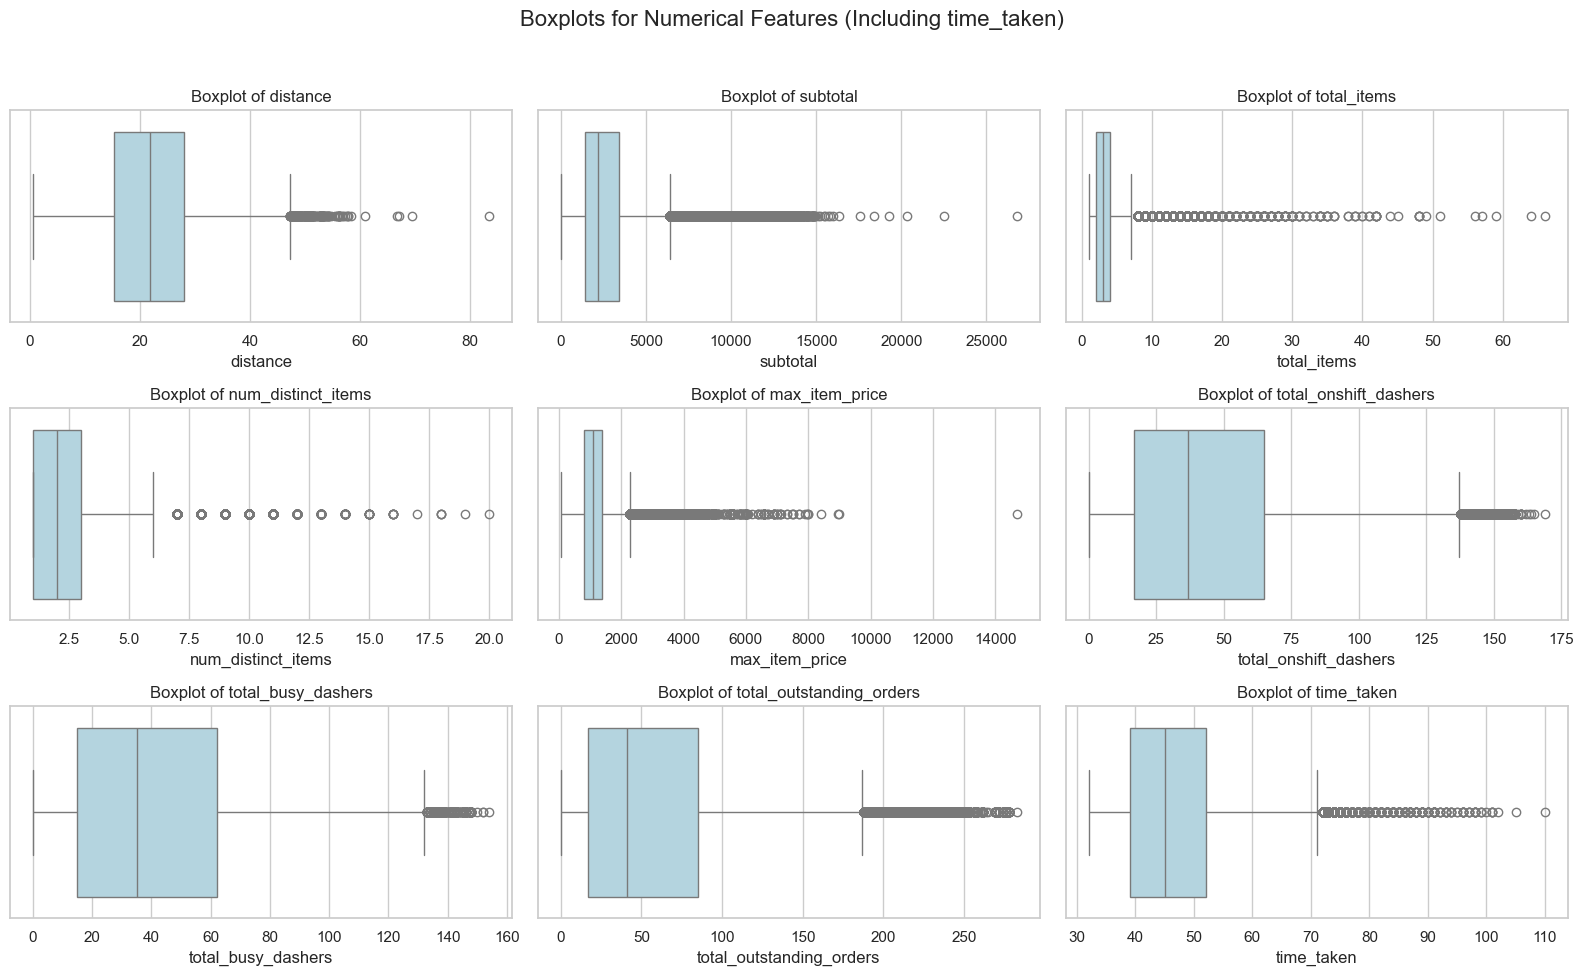

In [5247]:
# Boxplot for time_taken

# Include 'time_taken' in the list of features to check
numerical_cols_with_target = numerical_cols + ['time_taken']

# Create subplots
plt.figure(figsize=(16, 12))

for idx, col in enumerate(numerical_cols_with_target):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(x=df_train[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots for Numerical Features (Including time_taken)', fontsize=16, y=1.02)
plt.tight_layout()

plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [5251]:
# Handle outliers

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# # Apply outlier removal
df_train = remove_outliers_iqr(df_train, numerical_cols_with_target)

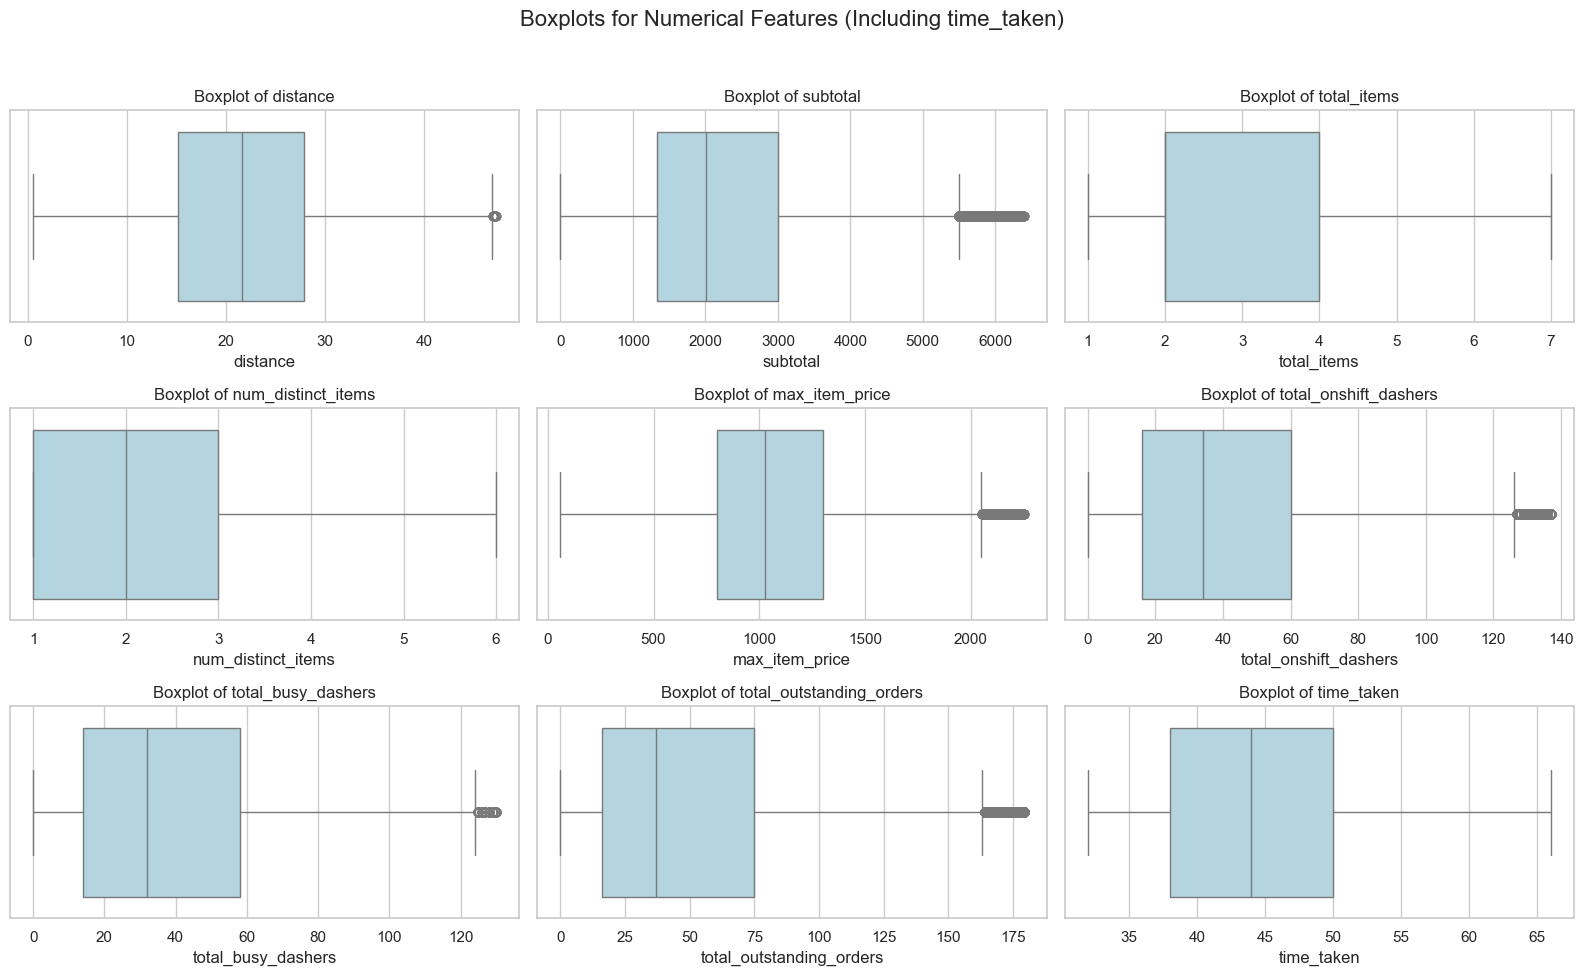

In [5253]:
# Create subplots

plt.figure(figsize=(16, 12))

for idx, col in enumerate(numerical_cols_with_target):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(x=df_train[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots for Numerical Features (Including time_taken)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [5255]:
df_train.shape

(118003, 10)

In [5257]:
# Handle outliers for test dataset

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# # Apply outlier removal
df_test = remove_outliers_iqr(df_test, numerical_cols_with_target)

df_test.shape

(29734, 10)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [5260]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

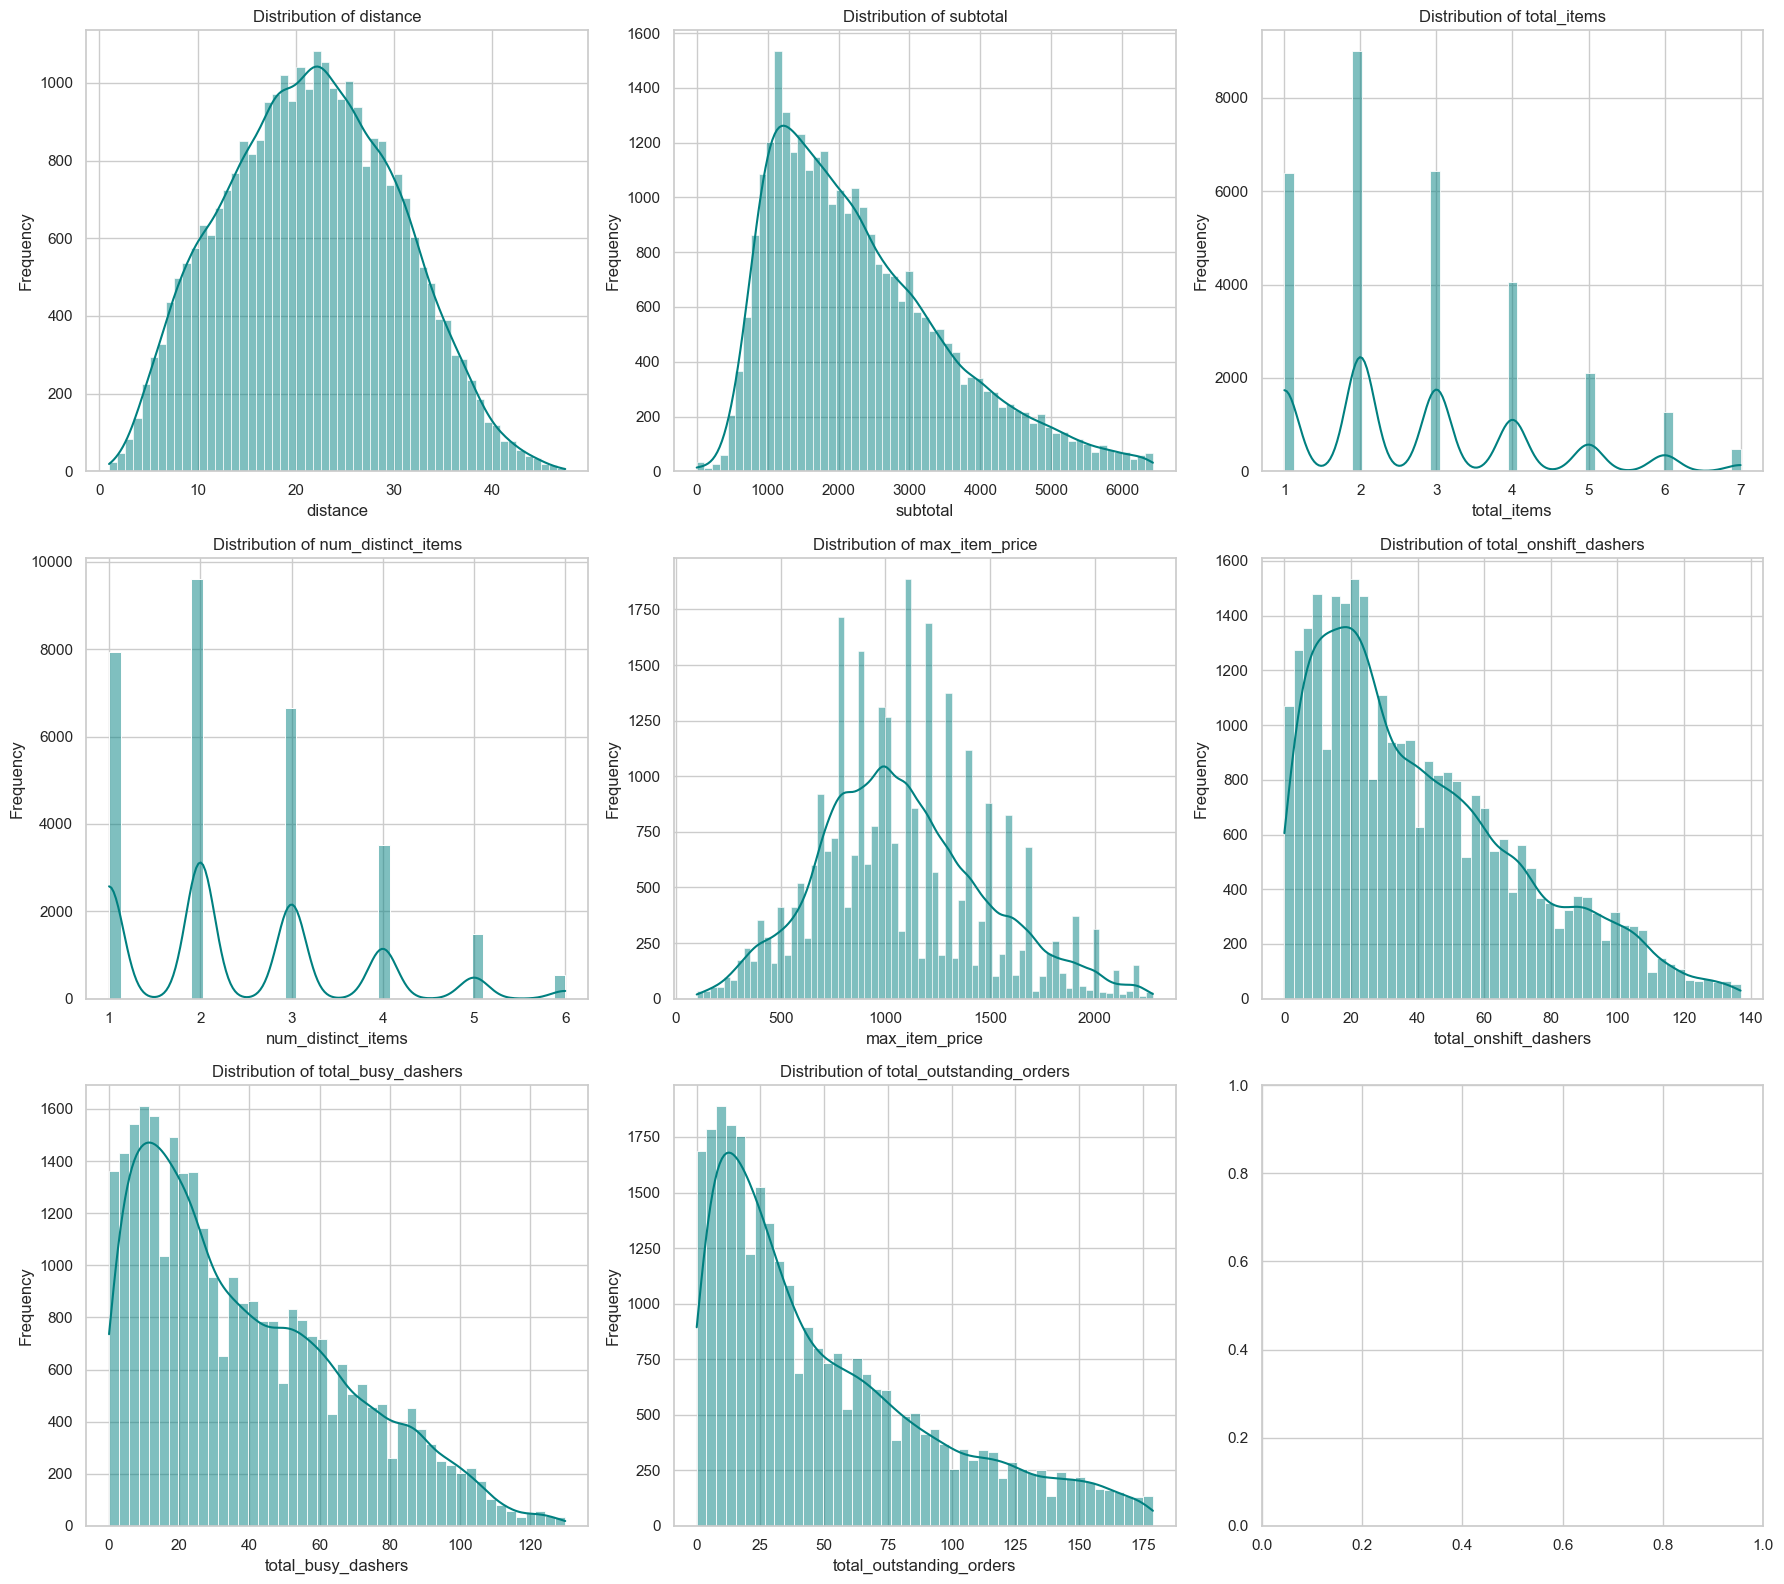

In [5264]:
# Plot distributions for all numerical columns

# Create subplots: 3 rows × 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 16))
axes = axes.flatten()  # Flatten to make indexing easy

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df_test[col], kde=True, color='teal', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

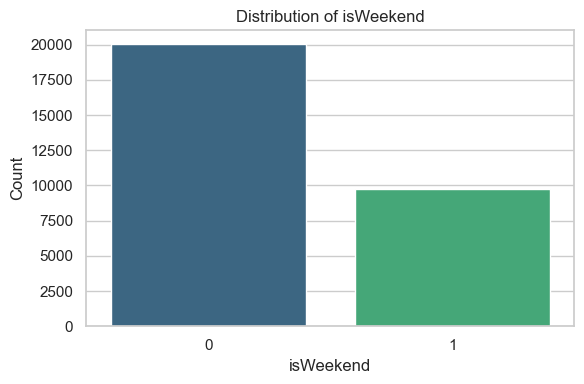

In [5271]:
# Distribution of categorical columns

plt.figure(figsize=(6, 4))
sns.countplot(x='isWeekend', data=df_test, palette='viridis')
plt.title('Distribution of isWeekend', fontsize=12)
plt.xlabel('isWeekend')
plt.ylabel('Count')
plt.xticks(rotation=0)  # no rotation needed here
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [5274]:
# Distribution of time_taken


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [5277]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [5280]:
# Drop the weakly correlated columns from training dataset


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [5284]:
# Import libraries

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [5287]:
scaler = MinMaxScaler()

In [5289]:
# Apply scaling to the numerical columns

df_train[numerical_cols_with_target] = scaler.fit_transform(df_train[numerical_cols_with_target])

In [5291]:
df_train.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  118003.000000  118003.000000       118003.000000   118003.000000   
mean        0.287542       0.358462            0.279822        0.462185   
std         0.244646       0.192595            0.245705        0.180556   
min         0.000000       0.000000            0.000000        0.000000   
25%         0.166667       0.208138            0.000000        0.337443   
50%         0.166667       0.314397            0.200000        0.440639   
75%         0.500000       0.469014            0.400000        0.566210   
max         1.000000       1.000000            1.000000        1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          118003.000000       118003.000000             118003.000000   
mean                0.298247            0.293279                  0.283269   
std                 0.223261            0.220658                  0.242894   
min                 0.000000            0.000000                  0.000000   
25%                 0.116788            0.107692                  0.089385   
50%                 0.248175            0.246154                  0.206704   
75%                 0.437956            0.446154                  0.418994   
max                 1.000000            1.000000                  1.000000   

            distance      isWeekend     time_taken  
count  118003.000000  118003.000000  118003.000000  
mean        0.451228       0.326797       0.366331  
std         0.184266       0.469044       0.232152  
min         0.000000       0.000000       0.000000  
25%         0.313196       0.000000       0.176471  
50%         0.450728       0.000000       0.352941  
75%         0.584404       1.000000       0.529412  
max         1.000000       1.000000       1.000000

In [5293]:
# Separate X_train and y_train again
X_train = df_train.drop(columns='time_taken')
y_train = df_train['time_taken']

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [5298]:
# Create/Initialise the model

X_train_lm = sm.add_constant(X_train)

In [5300]:
# Train the model using the training data

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [5302]:
lr.params

const                      -0.040756
total_items                -0.011153
subtotal                    0.272385
num_distinct_items          0.089703
max_item_price              0.083487
total_onshift_dashers      -1.420271
total_busy_dashers         -0.560347
total_outstanding_orders    1.890687
distance                    0.638316
isWeekend                   0.040689
dtype: float64

In [5304]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 4.890e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:19   Log-Likelihood:                 96576.
No. Observations:              118003   AIC:                        -1.931e+05
Df Residuals:                  117993   BIC:                        -1.930e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [5306]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5308]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4     total_onshift_dashers  30.46
5        total_busy_dashers  27.32
6  total_outstanding_orders  22.46
1                  subtotal  16.72
0               total_items  13.55
3            max_item_price  12.24
2        num_distinct_items  10.91
7                  distance   4.73
8                 isWeekend   1.48

In [5309]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('total_onshift_dashers', axis=1)

In [5312]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [5314]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 2.395e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:22   Log-Likelihood:                 61807.
No. Observations:              118003   AIC:                        -1.236e+05
Df Residuals:                  117994   BIC:                        -1.235e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [5316]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4        total_busy_dashers  19.52
5  total_outstanding_orders  16.87
1                  subtotal  16.72
0               total_items  13.54
3            max_item_price  12.19
2        num_distinct_items  10.91
6                  distance   4.69
7                 isWeekend   1.47

In [5318]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('total_busy_dashers', axis=1)

In [5320]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [5322]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:24   Log-Likelihood:                 36271.
No. Observations:              118003   AIC:                        -7.253e+04
Df Residuals:                  117995   BIC:                        -7.245e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [5324]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  subtotal  16.71
0               total_items  13.52
3            max_item_price  12.07
2        num_distinct_items  10.91
5                  distance   4.62
4  total_outstanding_orders   2.36
6                 isWeekend   1.47

In [5326]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('subtotal', axis=1)

In [5328]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [5330]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.316e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:26   Log-Likelihood:                 35119.
No. Observations:              118003   AIC:                        -7.022e+04
Df Residuals:                  117996   BIC:                        -7.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [5332]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        num_distinct_items  10.85
0               total_items  10.78
2            max_item_price   5.02
4                  distance   4.52
3  total_outstanding_orders   2.36
5                 isWeekend   1.47

In [5334]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('num_distinct_items', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 1.562e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:27   Log-Likelihood:                 34858.
No. Observations:              118003   AIC:                        -6.970e+04
Df Residuals:                  117997   BIC:                        -6.965e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [5336]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1            max_item_price  4.84
3                  distance  4.51
2  total_outstanding_orders  2.36
0               total_items  2.19
4                 isWeekend  1.47

In [5338]:
# Make predictions

df_test[numerical_cols_with_target] = scaler.transform(df_test[numerical_cols_with_target])

In [5340]:
df_test.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  29734.000000  29734.000000        29734.000000    29734.000000   
mean       0.289837      0.361746            0.283238        0.464588   
std        0.244883      0.195221            0.247466        0.182302   
min        0.000000      0.000000            0.000000        0.017808   
25%        0.166667      0.209390            0.000000        0.337443   
50%        0.166667      0.320031            0.200000        0.449772   
75%        0.500000      0.475235            0.400000        0.566210   
max        1.000000      1.007042            1.000000        1.012329   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count           29734.000000        29734.000000              29734.000000   
mean                0.299128            0.294978                  0.285472   
std                 0.225211            0.222776                  0.246314   
min                 0.000000            0.000000                  0.000000   
25%                 0.116788            0.107692                  0.089385   
50%                 0.240876            0.246154                  0.206704   
75%                 0.437956            0.446154                  0.424581   
max                 1.000000            1.000000                  1.000000   

           distance     isWeekend    time_taken  
count  29734.000000  29734.000000  29734.000000  
mean       0.450614      0.326798      0.370951  
std        0.186509      0.469050      0.237498  
min        0.009426      0.000000      0.000000  
25%        0.311054      0.000000      0.176471  
50%        0.449871      0.000000      0.352941  
75%        0.586118      1.000000      0.529412  
max        1.003428      1.000000      1.058824

In [5342]:
# Separate X_test and y_test again
X_test = df_test.drop(columns='time_taken')
y_test = df_test['time_taken']

In [5344]:
X_test_lm = sm.add_constant(X_test)

X_test_lm = X_test_lm.drop(['total_onshift_dashers', 'total_busy_dashers', 'subtotal', 'num_distinct_items'], axis = 1)

In [5346]:
# Making predictions using the fourth model
y_test_pred = lr_4.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

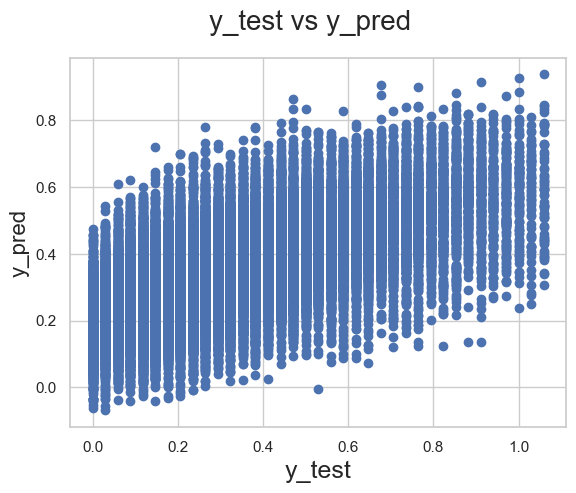

In [5348]:
# Find results for evaluation metrics
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [5353]:
# Separate X_train and y_train again
X_train = df_train.drop(columns='time_taken')
y_train = df_train['time_taken']

# Loop through the number of features and test the model

# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=8)

rfe = rfe.fit(X_train, y_train)

# To check results
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('total_items', False, 2),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('isWeekend', True, 1)]

In [5355]:
# Build the final model with selected number of features
col = X_train.columns[rfe.support_]

In [5357]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [5359]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [5361]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [5363]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 5.501e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:33:42   Log-Likelihood:                 96570.
No. Observations:              118003   AIC:                        -1.931e+05
Df Residuals:                  117994   BIC:                        -1.930e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [5365]:
y_train_pred_rfe = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

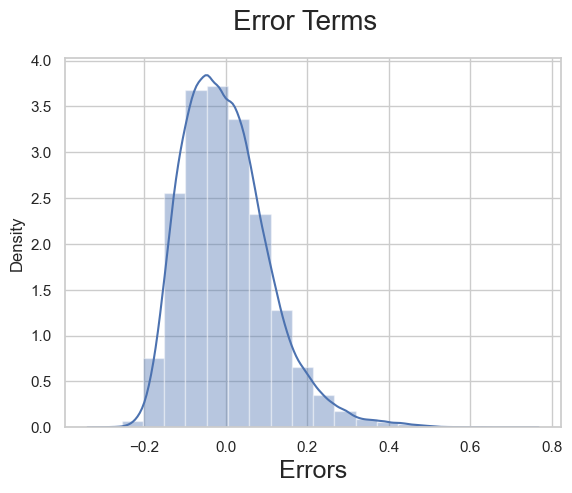

In [5367]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [5369]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred_rfe = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

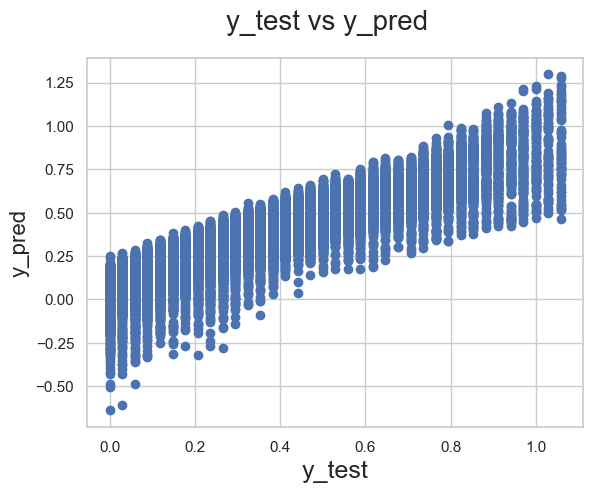

In [5371]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

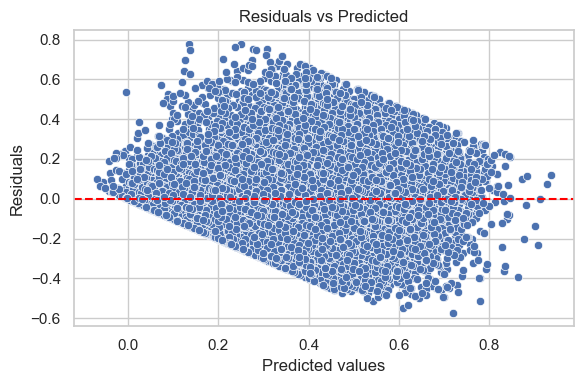

In [5375]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Calculate residuals
residuals = y_test - y_test_pred

# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()

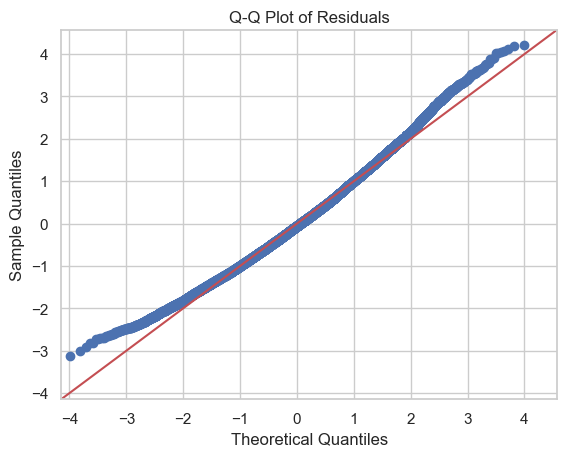

In [5377]:
# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

Text(0.5, 0, 'Errors')

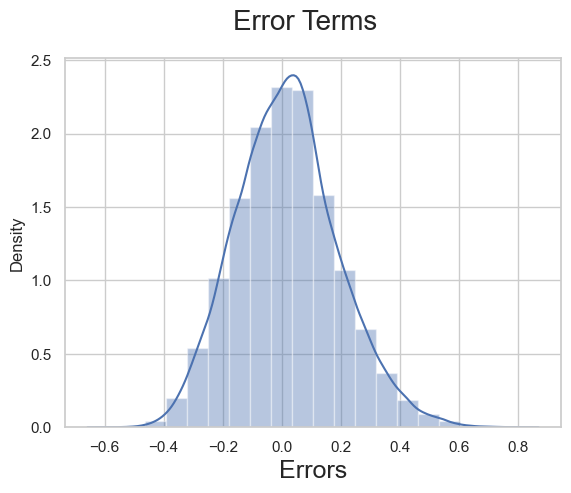

In [5379]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

[Your inferences here:]

### Residual Analysis Summary

**1. Residual Distribution:**  
- Residuals are approximately normally distributed.  
- Bell-shaped curve indicates good fit for normality assumption.

**2. Q-Q Plot:**  
- Residuals mostly follow the diagonal line.  
- Minor deviations in tails suggest slight non-normality.

**3. Residuals vs Predicted:**  
- Funnel shape indicates heteroscedasticity.  
- Variance of errors increases with predicted values.

**Conclusion:**  
- Normality assumption holds reasonably well.  
- Homoscedasticity is violated

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [5396]:
# Compare the scaled vs unscaled features used in the final model

# Get scaled coefficients from statsmodels
coef_df = pd.DataFrame({
    'Feature': lr_4.params.index,
    'Coefficient (Scaled)': lr_4.params.values
})

# For numerical features only (those scaled)
feature_ranges = pd.DataFrame({
    'Feature': numerical_cols,
    'Feature Range': df_train[numerical_cols].max() - df_train[numerical_cols].min()
})

# Merge and calculate unscaled coefficients
coef_df = coef_df.merge(feature_ranges, on='Feature', how='left')
coef_df['Coefficient (Unscaled)'] = coef_df['Coefficient (Scaled)'] * coef_df['Feature Range']

# Final output
coef_df[['Feature', 'Coefficient (Scaled)', 'Coefficient (Unscaled)']]



Feature  Coefficient (Scaled)  Coefficient (Unscaled)
0                     const             -0.146682                     NaN
1               total_items              0.200300                0.200300
2            max_item_price              0.231286                0.231286
3  total_outstanding_orders              0.208918                0.208918
4                  distance              0.606460                0.606460
5                 isWeekend              0.048010                     NaN

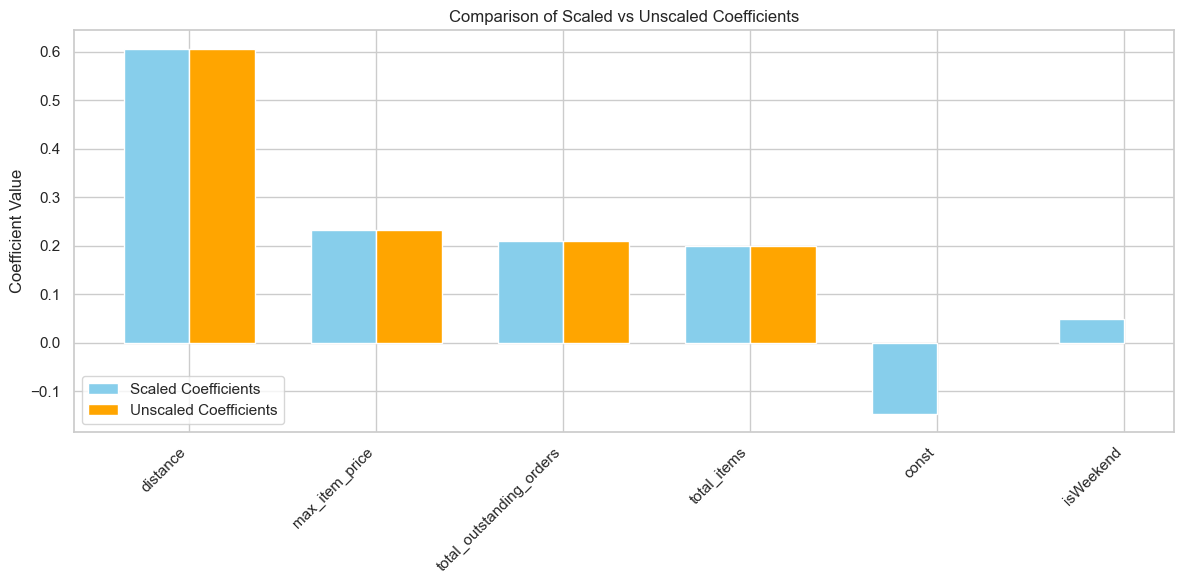

In [5399]:
# Sort for better visual
coef_df_sorted = coef_df.sort_values(by='Coefficient (Unscaled)', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot both scaled and unscaled
bar_width = 0.35
x = range(len(coef_df_sorted))

plt.bar(x, coef_df_sorted['Coefficient (Scaled)'], width=bar_width, label='Scaled Coefficients', color='skyblue')
plt.bar([p + bar_width for p in x], coef_df_sorted['Coefficient (Unscaled)'], width=bar_width, label='Unscaled Coefficients', color='orange')

# X-axis labels
plt.xticks([p + bar_width / 2 for p in x], coef_df_sorted['Feature'], rotation=45, ha='right')

# Labels and legend
plt.ylabel('Coefficient Value')
plt.title('Comparison of Scaled vs Unscaled Coefficients')
plt.legend()
plt.tight_layout()
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [5401]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Unscaled coefficient for 'total_items' from OLS regression
coef_total_items = lr_4.params['total_items']  # assuming lr is your fitted OLS model

# Interpretation
print(f"A unit increase in 'total_items' increases 'time_taken' by approximately {coef_total_items:.4f} minutes.")

A unit increase in 'total_items' increases 'time_taken' by approximately 0.2003 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>


### Categorical Variables in the Data

Yes, the dataset contains several categorical variables, including:
- `order_protocol`
- `market_id`
- `isWeekend`
- `order_hour` and `order_day` (treated as categorical during analysis)

### Inferences on Their Effect on Delivery Time (`time_taken`)

- **`isWeekend`**: Orders placed on weekends tend to take slightly more time, as seen from the positive coefficient and boxplot distribution, likely due to higher traffic or limited workforce.
  
- **`order_protocol`**: Some ordering protocols are associated with quicker or delayed deliveries, indicating differences in workflow or handling methods.

  
- **`market_id`**: Different markets may have operational differences; however, its impact was weak, and it was not selected in the final model.

  
- **`order_hour` and `order_day`**: Orders placed during peak hours or on certain days show variations in delivery time, likely reflecting business or traffic patterns.

These categorical features help capture contextual differences affecting delivery duration, improving model performance when encoded and interpreted correctly.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

### What does `test_size = 0.2` mean?

The parameter `test_size = 0.2` in the `train_test_split()` function specifies that **20% of the dataset** should be used as the **test set**, while the remaining **80%** will be used for **training** the model.

This ensures the model is trained on a large portion of the data and evaluated on unseen data to test its generalization ability.


---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

### Feature with Highest Correlation to Target Variable

From the heatmap, **`distance`** shows the **highest positive correlation** with the target variable `time_taken`.

This suggests that as the delivery distance increases, the delivery time also tends to increase significantly.


---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

### Outlier Detection and Treatment

- **Approach**: Outliers were identified using **boxplots** for numerical features, especially for the target variable `time_taken`.
- **Treatment**: We removed records where values lay significantly outside the interquartile range (IQR), ensuring model robustness without extreme influence from anomalous data.


---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


### Explanation of Linear Regression Algorithm

**1. Objective**  
Linear Regression aims to model the relationship between one or more independent variables (features) and a continuous dependent variable (target), by fitting a straight line (in simple linear regression) or a hyperplane (in multiple linear regression).

**2. Mathematical Formula**  
The general equation is: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε


Where:
- `y` is the predicted value,
- `x₁` to `xₙ` are the input features,
- `β₀` is the intercept,
- `β₁` to `βₙ` are the feature coefficients (slopes),
- `ε` is the error term.

**3. Working**  
- The model learns `β` coefficients by minimizing the **Residual Sum of Squares (RSS)**: RSS = Σ(actual_y - predicted_y)²

- The optimization is performed using **Ordinary Least Squares (OLS)** method.

**4. Assumptions**  
Linear regression assumes:
- Linearity between features and target
- Homoscedasticity (constant variance of residuals)
- Independence of errors
- No or minimal multicollinearity
- Normally distributed residuals

**5. Model Evaluation Metrics**  
- **R² (R-squared)**: Measures how well the regression line explains the variability of the data.
- **Adjusted R²**: Adjusts R² for the number of predictors.
- **p-values**: Indicate if a coefficient is statistically significant.
- **F-statistic**: Tests the overall significance of the model.

**6. Limitations**  
- Sensitive to outliers
- May underperform if the linear relationship assumption is violated
- Doesn't capture non-linear trends unless transformed features are used


---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

### Difference Between Simple and Multiple Linear Regression

| Feature                      | Simple Linear Regression                         | Multiple Linear Regression                         |
|-----------------------------|--------------------------------------------------|----------------------------------------------------|
| **Definition**              | Models relationship between one independent and one dependent variable | Models relationship between multiple independent variables and one dependent variable |
| **Equation**                | y = β₀ + β₁x + ε                                 | y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε               |
| **No. of Independent Vars**| Only one                                          | Two or more                                        |
| **Complexity**              | Easier to interpret and visualize                 | More complex, often requires careful interpretation|
| **Visualization**           | Represented with a straight line in 2D space     | Represented with a hyperplane in higher dimensions |
| **Use Case Example**        | Predicting salary based on years of experience   | Predicting house price based on area, location, no. of rooms, etc. |

**Conclusion**:  
Simple linear regression is suitable for basic, single-variable predictions. Multiple linear regression is more powerful for real-world problems with many influencing factors.


---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>



### Role of Cost Function in Linear Regression

**1. Purpose of Cost Function:**  
The cost function in linear regression measures how well the model’s predictions match the actual values. It quantifies the error between predicted values (`ŷ`) and actual values (`y`).

**2. Common Cost Function:**  
The most widely used cost function in linear regression is **Mean Squared Error (MSE)**:

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

It penalizes large errors more heavily and ensures the model aims to reduce overall prediction error.

**3. Minimization Technique:**  
To find the best-fitting line, the model minimizes the cost function. This is usually done using:

- **Analytical method**: Normal Equation (used in smaller datasets)
- **Optimization algorithm**: Gradient Descent — it iteratively updates model coefficients (θ) in the direction of the steepest descent of the cost function.

**Gradient Descent update rule**:

\[
\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
\]

where:
- \( \alpha \) = learning rate
- \( J(\theta) \) = cost function

**Conclusion:**  
Minimizing the cost function ensures the model finds the optimal parameters for the best predictions.

---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

### Difference Between Overfitting and Underfitting

| Aspect           | Overfitting                                         | Underfitting                                         |
|------------------|-----------------------------------------------------|------------------------------------------------------|
| **Definition**   | Model learns the training data *too well*, including noise and outliers | Model is *too simple* to capture the underlying trend in the data |
| **Cause**        | Too many features, complex model, or low regularization | Too few features or overly simple model              |
| **Training Error** | Very low                                             | High                                                  |
| **Test Error**   | High (poor generalization to new data)              | High (poor performance on both training and test data) |
| **Symptoms**     | High variance                                       | High bias                                             |
| **Example**      | A model fitting a wavy curve to linear data         | A straight line model for a quadratic relationship    |

**Conclusion:**  
- *Overfitting* = model memorizes but doesn’t generalize.  
- *Underfitting* = model fails to learn the data pattern.  
A good model balances both using the right complexity and regularization.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

>### Role of Residual Plots in Diagnosing Linear Regression

Residual plots help assess the validity of the linear regression assumptions by visualizing the residuals (errors) — the difference between actual and predicted values.

#### Key Insights from Residual Plots:

1. **Linearity Check**:
   - A random scatter of residuals around zero indicates a good linear fit.
   - A pattern (curve or funnel shape) suggests non-linearity — linear regression may not be appropriate.

2. **Homoscedasticity (Constant Variance)**:
   - Residuals should have constant spread.
   - If spread increases or decreases with fitted values (fan-shaped), heteroscedasticity is present.

3. **Independence of Errors**:
   - No correlation among residuals over time (in time series data).
   - Patterns may indicate autocorrelation.

4. **Normality of Residuals**:
   - Can be checked using a Q-Q plot.
   - Deviations from a diagonal line suggest non-normal residuals.

**Conclusion**:  
Residual plots are essential to validate assumptions and improve model accuracy by identifying issues like non-linearity, heteroscedasticity, or outliers.
